<a href="https://colab.research.google.com/github/dutta-arka/Resonance-Capture-of-Planets/blob/main/RTP%3B%20Orbital_Period%20%2B%20Modelling_Using_Rebound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rebound

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.9/744.9 kB 10.2 MB/s eta 0:00:00


In [6]:
# Import all the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv("E2.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   2MASS J19383260+4603591 b  1102 non-null   object 
 1   2MASS J19383260+4603591    1102 non-null   object 
 2   406                        1100 non-null   float64
dtypes: float64(1), object(2)
memory usage: 26.0+ KB


In [4]:
# Group the DataFrame by the names in column 2
grouped = df.groupby(df.iloc[:, 1])

# Initialize an empty list to store dictionaries
output = []

# Initialize a counter
counter = 1

# Iterate over each group
for name, group in grouped:
    # Create a dictionary for the current group
    d = {}
    for index, row in group.iterrows():
        # Extract the key from column 1 and value from column 3
        key = row.iloc[0][-1]  # Extract the last character from the string in column 1
        value = row.iloc[2]
        # Check if the value is not NaN
        if not np.isnan(value):
            d[key] = value
    # Append the dictionary to the output list
    if d:
      output.append({'No.': counter, 'Host Names': name, 'Orbital Period Values': d})
      counter += 1

# Convert the list of dictionaries to a DataFrame
odf = pd.DataFrame(output)

# Print the output as a table
print(odf.to_string(index=False))

 No.              Host Names                                                                                                      Orbital Period Values
   1 2MASS J19383260+4603591                                                                                                   {'c': 1460.0, 'd': 43.0}
   2                  47 UMa                                                                                   {'b': 1078.0, 'c': 2391.0, 'd': 14002.0}
   3                  55 Cnc                                                     {'b': 14.6516, 'c': 44.3989, 'd': 5574.2, 'e': 0.7365474, 'f': 259.88}
   4                  61 Vir                                                                                     {'b': 4.215, 'c': 38.021, 'd': 123.01}
   5                  AU Mic                                                                            {'b': 8.4629991, 'c': 18.858991, 'd': 12.73596}
   6                 CoRoT-7                                                            

In [7]:
results = []
err = 0.05

for index, row in odf.iterrows():
    host_name = row['Host Names']
    orbital_period_values = row['Orbital Period Values']

    ratios = set()  # Use a set to avoid duplicates
    for i in range(len(orbital_period_values)):
        for j in range(i + 1, len(orbital_period_values)):
            # Calculate all possible ratios with denominators from 1 to 9
            for denominator in range(1, 10):
                try:
                    ratio = orbital_period_values[list(orbital_period_values.keys())[j]] / (
                        denominator * orbital_period_values[list(orbital_period_values.keys())[i]]
                    )
                    # Check if the ratio is close to an integer
                    rounded_ratio = round(ratio)
                    if abs(ratio - rounded_ratio) <= err and (rounded_ratio != 0 and denominator != 0):
                        # Simplify the ratio if possible
                        gcd = abs(math.gcd(int(rounded_ratio), denominator))

                        # Ensure a > b in the simplified ratio
                        numerator = int(rounded_ratio // gcd)
                        denominator = denominator // gcd
                        if numerator < denominator:
                            numerator, denominator = denominator, numerator

                        simplified_ratio = f"{numerator}:{denominator}"
                        ratios.add(simplified_ratio)
                except ZeroDivisionError:
                    pass  # Handle potential zero division errors

    if ratios:
        results.append({'No.': index + 1, 'Host Names': host_name, 'Orbital Period Values': orbital_period_values, 'Ratios': list(ratios)})

# Create a DataFrame from the results
rdf = pd.DataFrame(results)

print(rdf.to_string(index=False))

 No.     Host Names                                                                                                      Orbital Period Values                                                                              Ratios
   2         47 UMa                                                                                   {'b': 1078.0, 'c': 2391.0, 'd': 14002.0}                                                                    [3:2, 13:1, 6:1]
   3         55 Cnc                                                     {'b': 14.6516, 'c': 44.3989, 'd': 5574.2, 'e': 0.7365474, 'f': 259.88}                                                           [3:1, 3:2, 2:1, 9:2, 6:1]
   4         61 Vir                                                                                     {'b': 4.215, 'c': 38.021, 'd': 123.01}                                                                          [1:1, 9:1]
   7         DMPP-1                                                                         

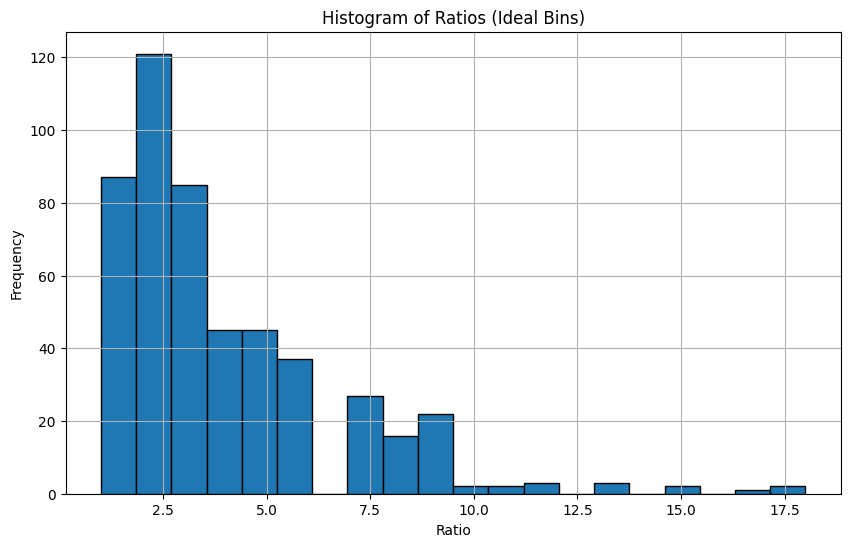

In [8]:
# Extract all ratios from the DataFrame and evaluate them
all_ratios = []
for ratios in rdf['Ratios']:
    for ratio in ratios:
        numerator, denominator = map(int, ratio.split(':'))
        ratio_value = numerator / denominator
        if ratio_value <= 20:  # Filter out values bigger than 20
            all_ratios.append(ratio_value)

# Function to find an ideal bin number using Freedman-Diaconis rule
# def ideal_bin_width(data):
#     iqr = np.percentile(data, 75) - np.percentile(data, 25)
#     n = len(data)
#     bw = 2 * iqr / np.power(n, 1/3)
#     return int(np.ceil((max(data) - min(data)) / bw))

# Find the ideal bin number
# ideal_bins = ideal_bin_width(all_ratios)
ideal_bins = 20

# Plot the histogram with the ideal bin number
plt.figure(figsize=(10, 6))
plt.hist(all_ratios, bins=ideal_bins, edgecolor='black')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Ratios (Ideal Bins)')
plt.grid(True)
plt.show()

Histogram data saved to: orb.txt


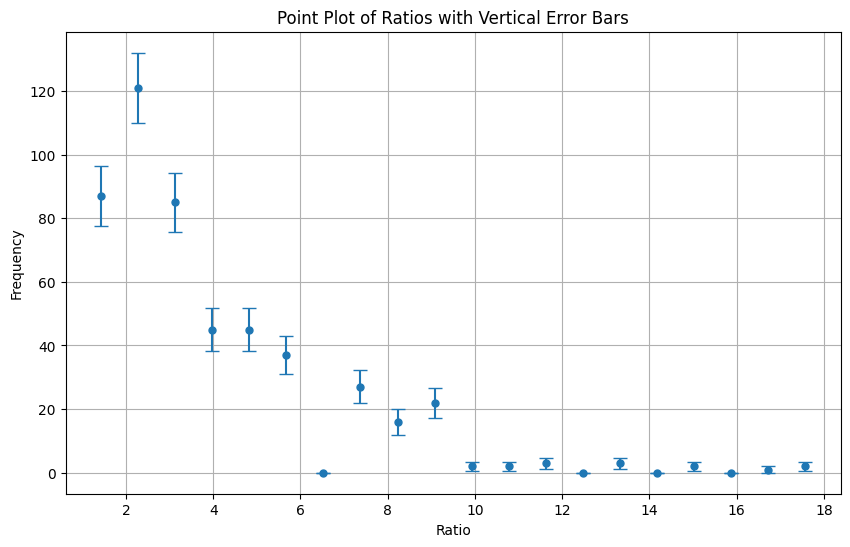

In [9]:
# Calculate the histogram
hist_values, bin_edges = np.histogram(all_ratios, bins=ideal_bins)

# Calculate the centers of the histogram bins
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate the standard deviation associated with each bin
bin_std_dev = np.sqrt(hist_values)

# Save data to a text file (modify filename as needed)
filename = "orb.txt"
with open(filename, 'w') as f:
  # Save header row (optional)
  f.write("Bin Centers, Frequencies\n")

  # Save data in comma-separated format (CSV)
  for center, value in zip(bin_centers, hist_values):
    f.write(f"{center:.4f},{value:.0f}\n")

print(f"Histogram data saved to: {filename}")

# Plot the point plot with vertical error bars
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, hist_values, yerr=bin_std_dev, fmt='o', markersize=5, capsize=5)
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Point Plot of Ratios with Vertical Error Bars')
plt.grid(True)
plt.show()

In [10]:
import numpy as np
import rebound

# Gravitational constant
G = 6.6743e-11  # m^3 kg^-1 s^-2

# Example data for 55 Cnc system
masses = np.array([0.00774, 0.00155, 0.03003, 0.00024, 0.00145])  # Assumed planetary masses (normalized)
semi_major_axes = np.array([0.1134, 0.2373, 5.957, 0.01544, 0.7708])  # Semi-major axes (normalized)

# Convert to SI units (assuming star mass is 1 solar mass)
star_mass = 0.91*1.989e30  # Solar mass in kg
masses *= star_mass
semi_major_axes *= 1.496e11  # Astronomical Unit in meters

# Calculate orbital periods from Kepler's Third Law
orbital_periods = np.sqrt((semi_major_axes**3) / (G * star_mass))

# Function to analyze potential resonances (basic example)
def analyze_resonances(orbital_periods):
    ratios = []
    for i in range(len(orbital_periods) - 1):
        for j in range(i + 1, len(orbital_periods)):
            ratio = orbital_periods[i] / orbital_periods[j]
            ratios.append(round(ratio, 2))
    return ratios

# Analyze potential resonances
resonance_ratios = analyze_resonances(orbital_periods)

# Example N-body simulation using REBOUND
sim = rebound.Simulation()

# Define system parameters
sim.add(m=star_mass, x=0, y=0, z=0)  # Add the central star
for i, (mass, a) in enumerate(zip(masses, semi_major_axes)):
    sim.add(m=mass, x=a, y=0, z=0, vx=-np.sqrt(G * star_mass / a))  # Add planets with circular orbits

# Set simulation parameters (replace with desired values)
sim.dt = 1e-7  # Time step (adjust based on system dynamics)
sim.n_steps = 10000  # Number of time steps

time_steps = sim.n_steps

# Run the simulation
sim.integrate(sim.t + sim.dt * sim.n_steps)

# Example: Calculate Hill radii for each planet
hill_radii = np.sqrt(semi_major_axes**3 / (3 * G * star_mass))

# Example: Monitor minimum distances between planets
min_distances = np.zeros((len(masses) - 1, len(masses)))
for t in range(time_steps):
    for i in range(len(masses) - 1):
        for j in range(i + 1, len(masses)):
            distance = np.linalg.norm(np.array(sim.particles[i+1].xyz) - np.array(sim.particles[j+1].xyz))
            min_distances[i, j] = min(min_distances[i, j], distance)

# Analyze stability based on minimum distances relative to Hill radii
# (Replace with more comprehensive stability analysis techniques)
stability_flags = np.ones(len(masses))
for i in range(len(masses) - 1):
    for j in range(i + 1, len(masses)):
        if min_distances[i, j] < 2 * (hill_radii[i] + hill_radii[j]):
            stability_flags[i] = 0
            stability_flags[j] = 0

filtered_data = [x for x in resonance_ratios if x >= 2*err and x <= 20]

# Print results (replace with desired output)
print("Resonance ratios:", filtered_data)
print("Stability flags:", stability_flags)  # Placeholder, replace with stability metrics

Resonance ratios: [0.33, 19.9, 0.17]
Stability flags: [0. 0. 0. 0. 0.]


The ratios found in 55 Cnc: [2:1, 9:2, 3:1, 6:1, 3:2]

The ratios found in the simulation: [3:1, 20:1, 5:1]: With a very simplistic simulation of KAM it catches all integer:1 ratios.